# Statistic Analysis for the Relationship between Moderation & User Engagement


In [2]:
from matplotlib.pyplot import ylabel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utils.SocialMediaDataset import MastodonDataset, RedditDataset
from utils.statistic_analysis import *
from scipy.stats import zscore


## 1. Data Preprocessing

In [4]:
mastodon = MastodonDataset(keep_common_col_only = False)
reddit = RedditDataset(keep_common_col_only = False)
mastodon.clean()
reddit.clean()


Starting data cleaning process... 🧹🧼
Cleaning column: source_url
Cleaning column: description
Cleaning column: active_month
Cleaning column: languages
Cleaning column: rules
Cleaning column: top_5_trends
Cleaning column: total_users
Cleaning column: total_posts
Cleaning column: blacklist
Data is all clean and shiny! ✨🫧

Starting data cleaning process... 🧹🧼
Cleaning column: description
Cleaning column: languages
Cleaning column: total_users
Cleaning column: active_month
Cleaning column: over18
Cleaning column: quarantine
Cleaning column: is_restricted
Cleaning column: moderators_count
Cleaning column: rules
Data is all clean and shiny! ✨🫧


In [5]:
df_mastodon = mastodon.df
df_mastodon['rules_num']=df_mastodon['rules'].apply(len)
df_mastodon.head(5)

,domain,title,source_url,description,active_month,languages,rules,top_5_trends,total_users,total_posts,blacklist,rules_num
0,mastodon.social,Mastodon,https://github.com/mastodon/mastodon,The original server operated by the Mastodon g...,327503,[en],"[{'id': '1', 'text': 'Sexually explicit or vio...",[],2711879,129725014,366,6
1,mstdn.social,Mastodon 🐘,https://github.com/mastodon/mastodon,A general-purpose Mastodon server with a 500 c...,14546,[en],"[{'id': '2', 'text': 'Sexually explicit or vio...",[],260323,19904208,300,8
2,infosec.exchange,Infosec Exchange,https://github.com/glitch-soc/mastodon,A Mastodon instance for info/cyber security-mi...,13319,[en],"[{'id': '1', 'text': 'Do unto others as you th...",[],75725,4296664,503,14
3,mas.to,mas.to,https://github.com/mastodon/mastodon,"Hello! mas.to is a fast, up-to-date and fun Ma...",11889,[en],"[{'id': '9', 'text': 'No discrimination, inclu...",[],183608,10834206,544,9
4,mastodon.world,Mastodon,https://github.com/mastodon/mastodon,Generic Mastodon server for anyone to use.,9472,[en],"[{'id': '16', 'text': 'No illegal content, e.g...",[],191710,7158644,1,18


## 2. Statistic Analysis of Mastodon
### 2.1 Distribution Analysis

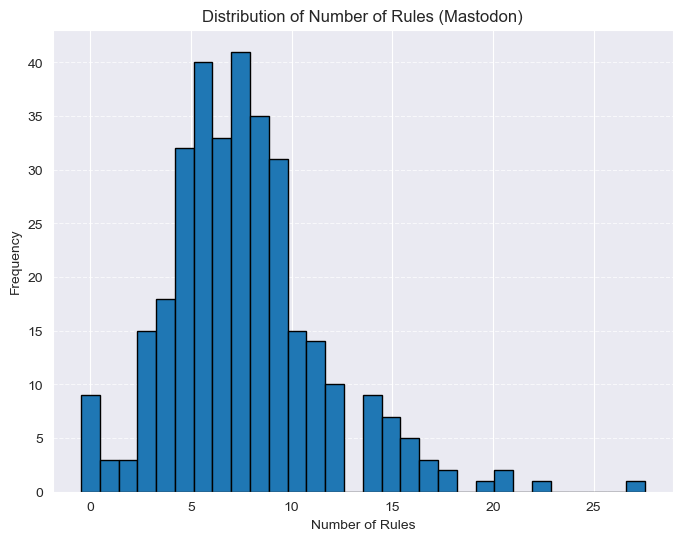

In [6]:
plot_distribution(df_mastodon['rules_num'],'Number of Rules','Frequency','Distribution of Number of Rules (Mastodon)', df_mastodon['rules_num'].max()+2)

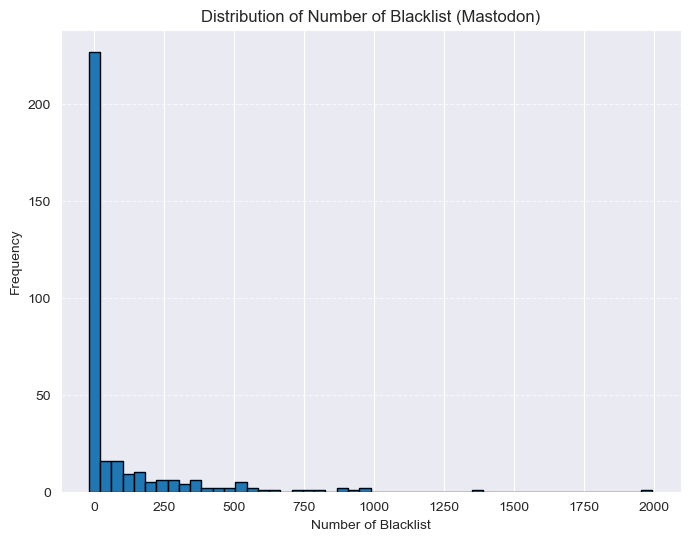

In [7]:
plot_distribution(df_mastodon['blacklist'],'Number of Blacklist','Frequency','Distribution of Number of Blacklist (Mastodon)', 50)

### 2.2 Correlation Analysis

In [8]:
df_mastodon['active_rate']=df_mastodon['active_month']/df_mastodon['total_users']
idx_max = df_mastodon['active_month'].idxmax()
df_re_mastodon = df_mastodon.drop(idx_max).copy()

--------rules_num,active_rate---------
Pearson correlation coefficient: 0.007100277447454634
P-value: 0.898068104651979
Spearmanr correlation coefficient: 0.049730810003937274
P-value: 0.36930260182051367


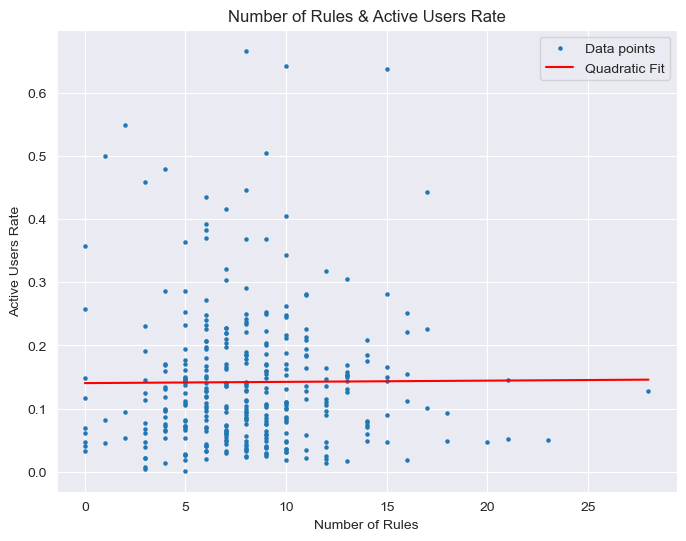

r2=5.041393983074016e-05
--------blacklist,active_rate---------
Pearson correlation coefficient: 0.027002647928931076
P-value: 0.6260736485380937
Spearmanr correlation coefficient: 0.07618463264232724
P-value: 0.16866808586596385


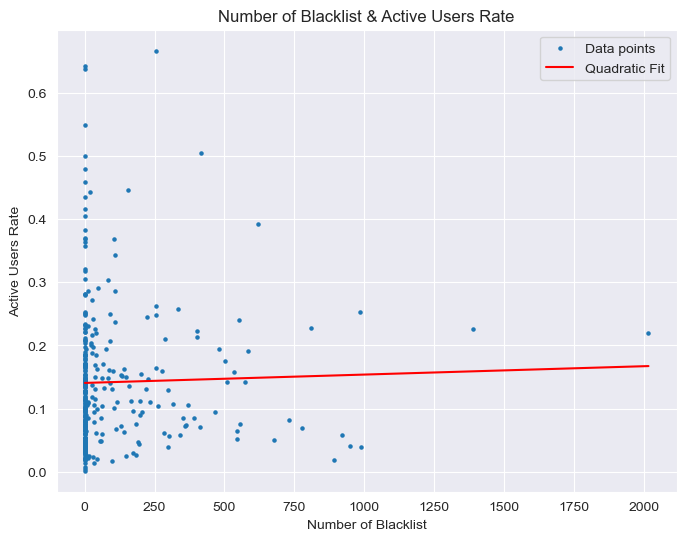

r2=0.0007291429951737927
--------rules_num,total_users---------
Pearson correlation coefficient: 0.12591530528144362
P-value: 0.022353735168071535
Spearmanr correlation coefficient: 0.13673318325530642
P-value: 0.013052076298115917


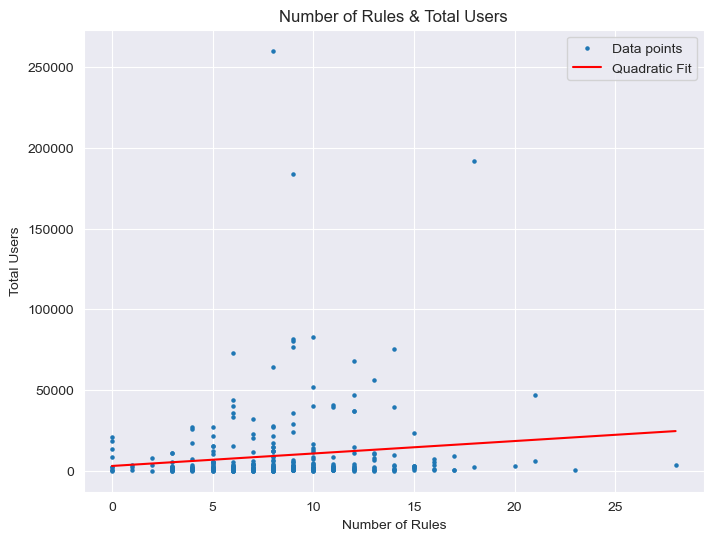

r2=0.015854664104118843
--------blacklist,total_users---------
Pearson correlation coefficient: 0.18109037383260537
P-value: 0.0009685678634628888
Spearmanr correlation coefficient: 0.2044595721569018
P-value: 0.00018848794899027063


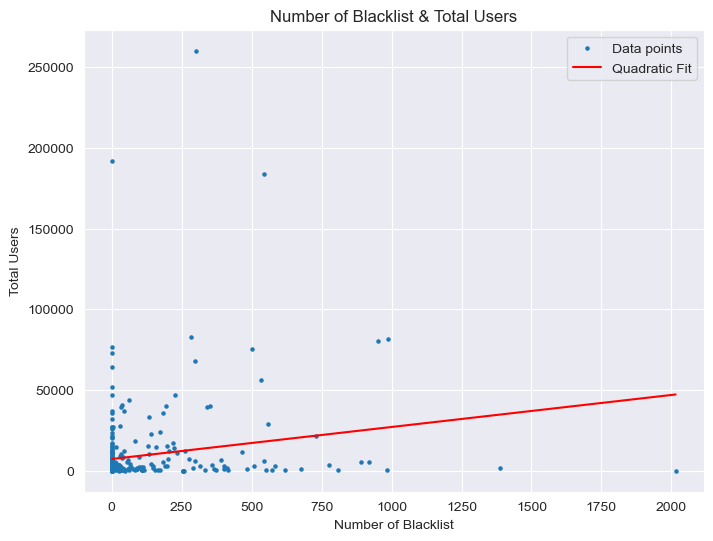

r2=0.03279372349483267
--------rules_num,active_month---------
Pearson correlation coefficient: 0.15829017712183435
P-value: 0.003997433193944499
Spearmanr correlation coefficient: 0.1733947526817195
P-value: 0.0015936139203846635


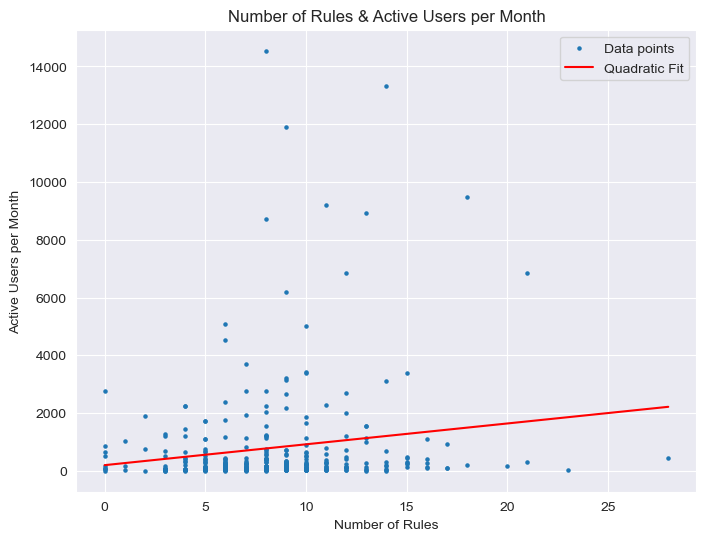

r2=0.02505578017326171
--------blacklist,active_month---------
Pearson correlation coefficient: 0.17099147092254718
P-value: 0.0018541270702280104
Spearmanr correlation coefficient: 0.2466146067185124
P-value: 6.003697201491983e-06


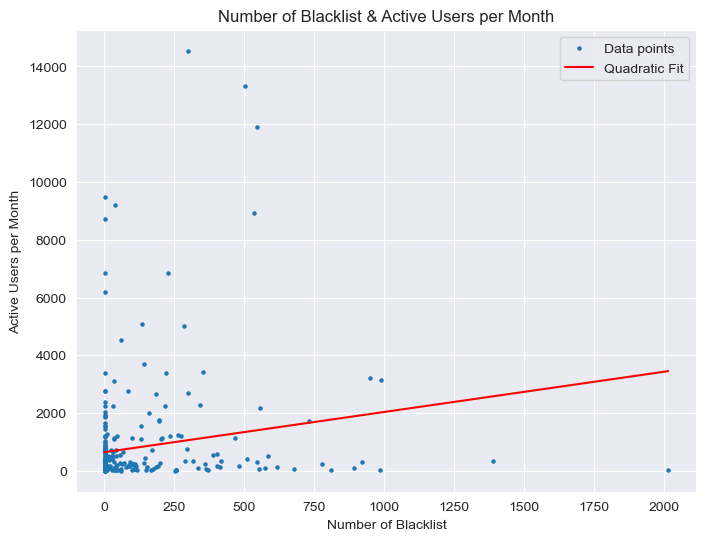

r2=0.029238083128256265
--------rules_num,total_posts---------
Pearson correlation coefficient: 0.14128830556151978
P-value: 0.010291807756663574
Spearmanr correlation coefficient: 0.14949700321702028
P-value: 0.006595786339940512


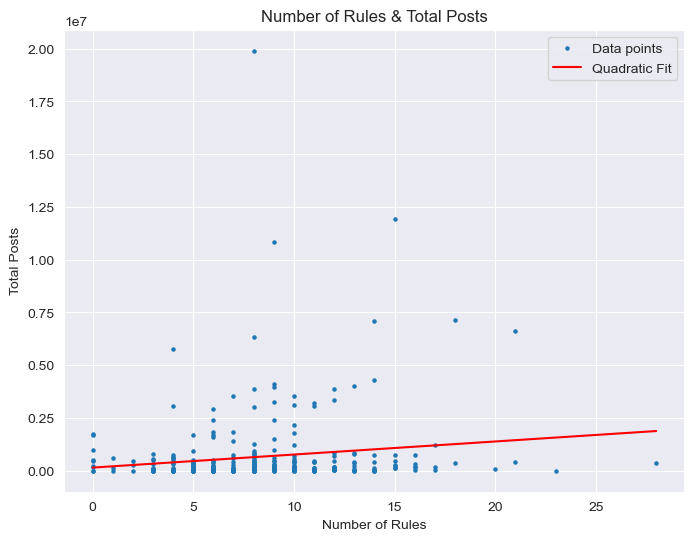

r2=0.019962385288445406
--------blacklist,total_posts---------
Pearson correlation coefficient: 0.15728416121196767
P-value: 0.004238563158284124
Spearmanr correlation coefficient: 0.2782024532636464
P-value: 2.920195527893398e-07


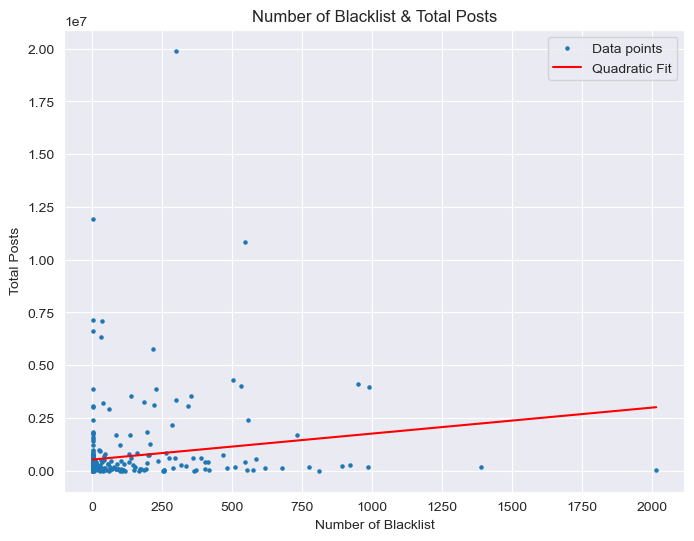

r2=0.02473830736815219


In [9]:
factors= ['rules_num','blacklist']
user_engagement=['active_rate','total_users','active_month','total_posts']

label_dict={
    'rules_num':'Number of Rules',
    'blacklist':'Number of Blacklist',
    'active_rate':'Active Users Rate',
    'total_users':'Total Users',
    'active_month':'Active Users per Month',
    'total_posts':'Total Posts'
}

for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    for factor in factors:
        print(f"--------{factor},{engagement}---------")
        pearsonr_correlation(df[factor],df[engagement])
        spearmanr_correlation(df[factor],df[engagement])
        xlabel=label_dict[factor]
        ylabel=label_dict[engagement]
    #     
        plot_scatter(df[factor],df[engagement],xlabel,ylabel,f'{xlabel} & {ylabel}')

----------active_rate---------
🔍 SHAP Summary Plot (feature importance):


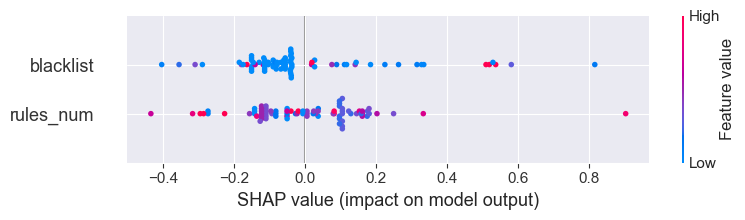

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

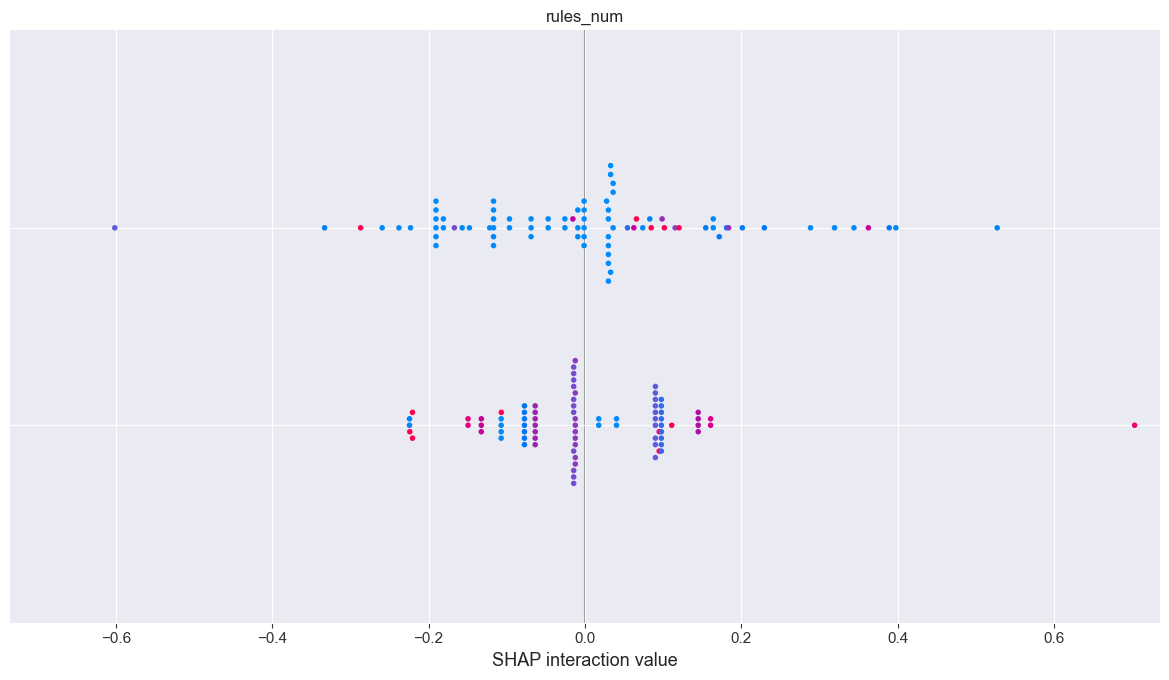

----------total_users---------
🔍 SHAP Summary Plot (feature importance):


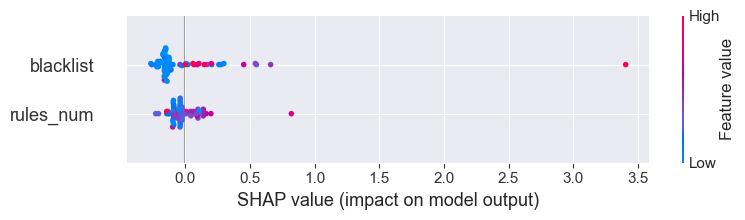

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

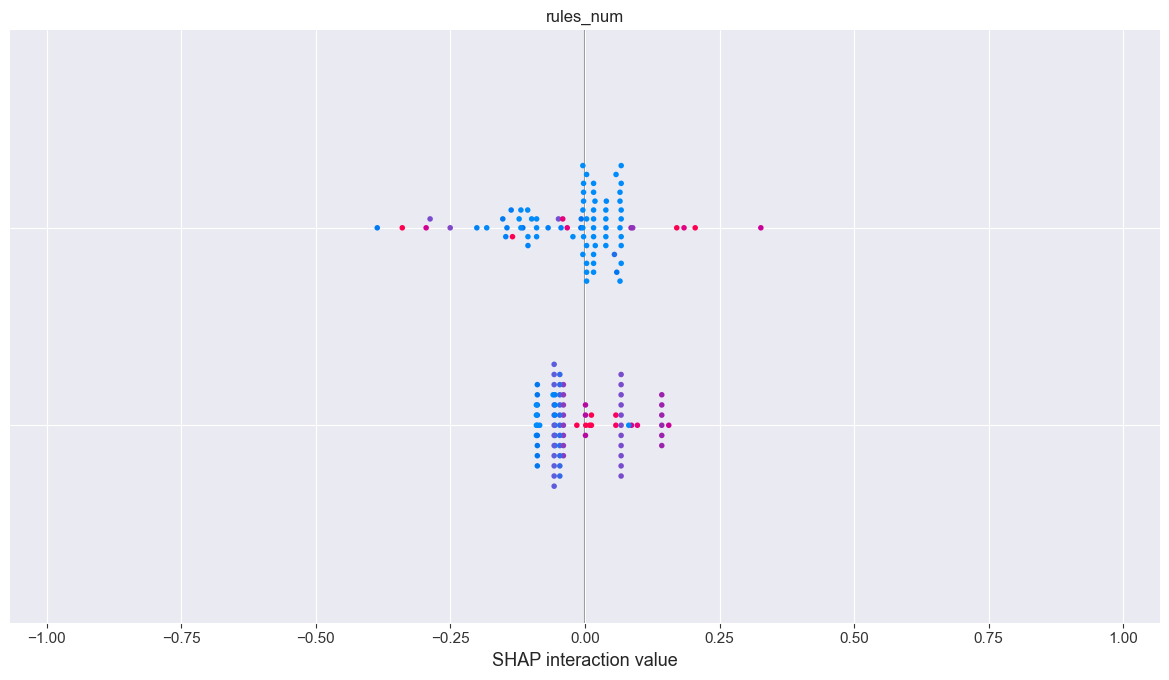

----------active_month---------
🔍 SHAP Summary Plot (feature importance):


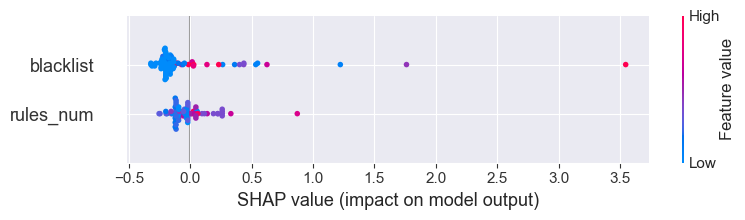

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

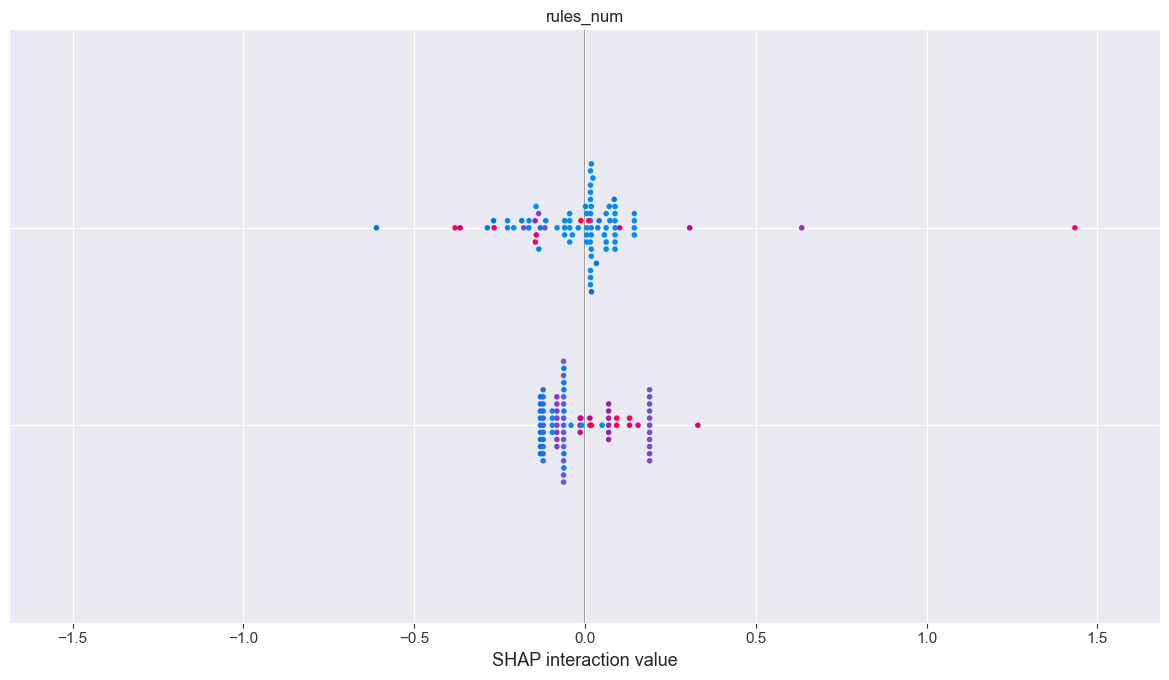

----------total_posts---------
🔍 SHAP Summary Plot (feature importance):


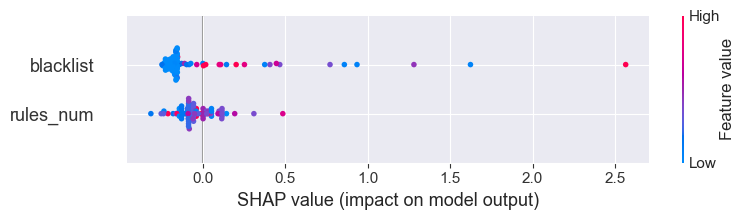

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

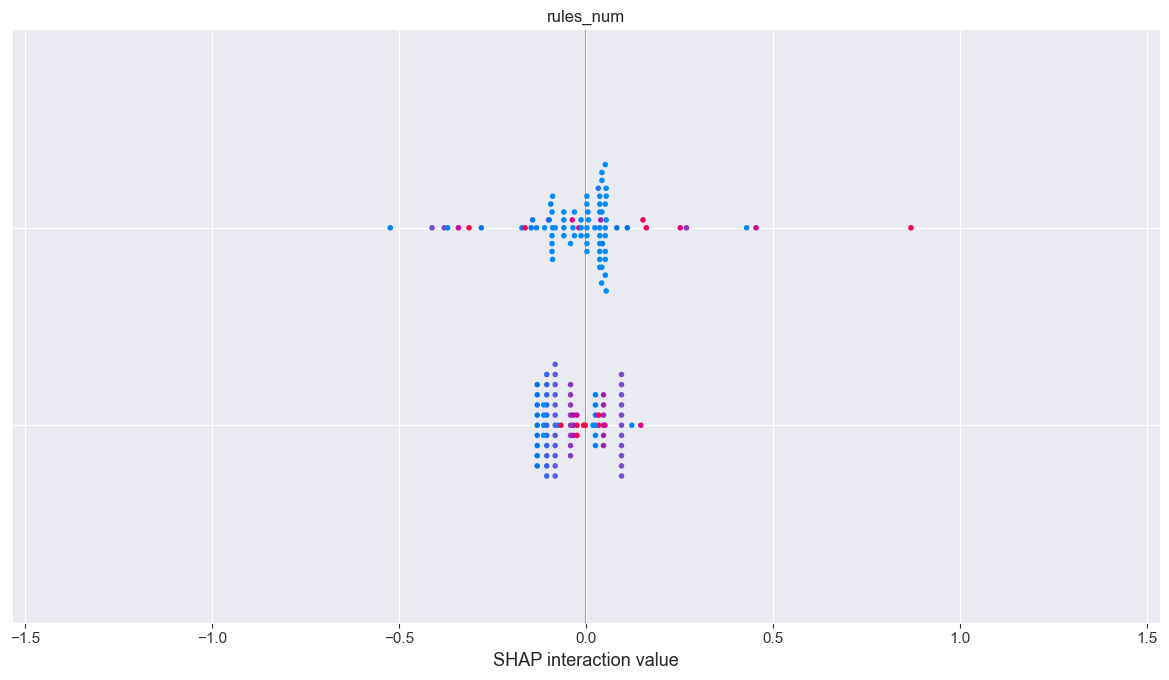

In [10]:
factors= ['rules_num','blacklist']
user_engagement=['active_rate','total_users','active_month','total_posts']

label_dict={
    'rules_num':'Number of Rules',
    'blacklist':'Number of Blacklist',
    'active_rate':'Active Users Rate',
    'total_users':'Total Users',
    'active_month':'Active Users per Month',
    'total_posts':'Total Posts'
}

for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    print(f'----------{engagement}---------')
    shap_analysis(df,factors,engagement)

## 3. Statistics of Mastodon

In [11]:
df_reddit = reddit.df
df_reddit['rules_num']=df_reddit['rules'].apply(len)
df_reddit.head(5)

,domain,title,description,languages,total_users,active_month,over18,quarantine,is_restricted,moderators_count,rules,rules_num
0,Home,Home,nan,en,307843,51,False,False,False,8,[],0
1,AskReddit,Ask Reddit...,r/AskReddit is the place to ask and answer tho...,es,54701432,9986,False,False,False,32,[Rule 1 - Questions must be clear and direct a...,11
2,NoStupidQuestions,No such thing as stupid questions,Ask away!\r\n\r\nDisclaimer: This is an anonym...,en,6021303,4872,False,False,False,27,[Top level comments must contain a genuine hum...,9
3,BaldursGate3,Baldur's Gate 3,"A community all about Baldur's Gate III, the r...",en,3118378,1384,False,False,False,12,"[Be civil to one another., Respect the opinio...",15
4,facepalm,now double verified,/r/facepalm - please sir can I have some more?,en,8145733,2345,False,False,False,24,"[No uncivil, bigoted, misogynist, misandrist, ...",10


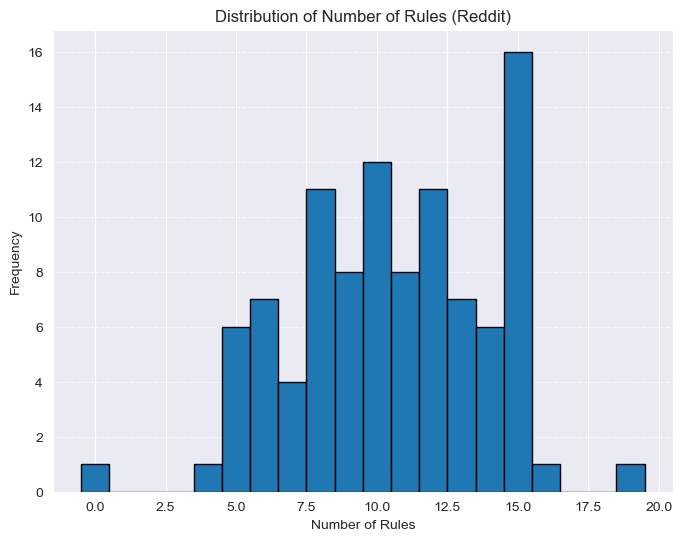

In [12]:
plot_distribution(df_reddit['rules_num'],'Number of Rules','Frequency','Distribution of Number of Rules (Reddit)', df_reddit['rules_num'].max())

### 3.1 Correlation Analysis

In [13]:
df_reddit['active_rate']=df_reddit['active_month']/df_reddit['total_users']

--------rules_num,active_rate---------
Pearson correlation coefficient: 0.004168762064764367
P-value: 0.9671654108316072
Spearmanr correlation coefficient: 0.06035665690690919
P-value: 0.5508262491436264


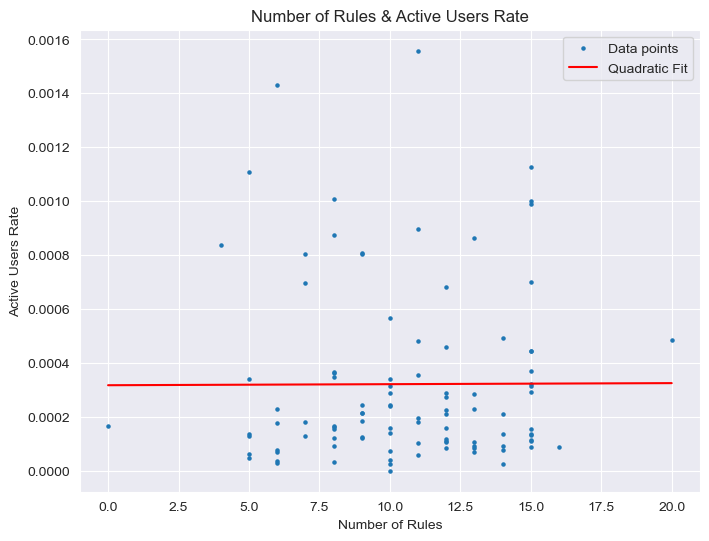

r2=1.7378577152560304e-05
--------moderators_count,active_rate---------
Pearson correlation coefficient: -0.05267709615588494
P-value: 0.602708329508911
Spearmanr correlation coefficient: 0.033361281823697665
P-value: 0.7417700692991827


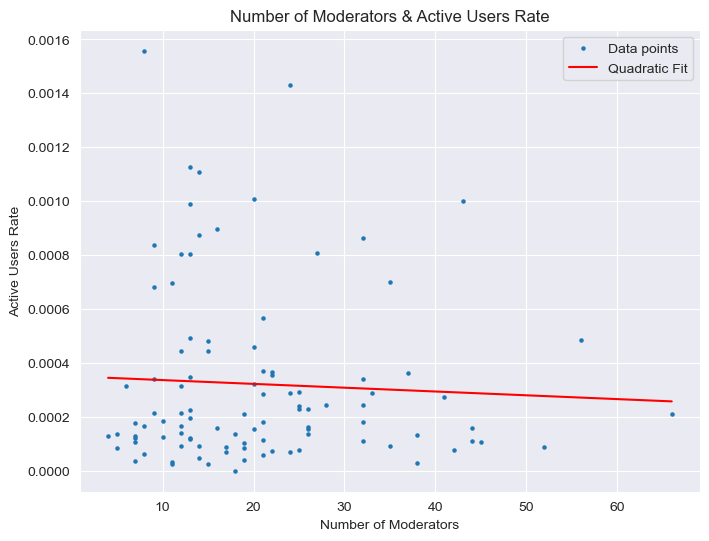

r2=0.002774876459416098
--------rules_num,total_users---------
Pearson correlation coefficient: 0.06763317868439955
P-value: 0.503754005443411
Spearmanr correlation coefficient: 0.17228040059445404
P-value: 0.08653154205425832


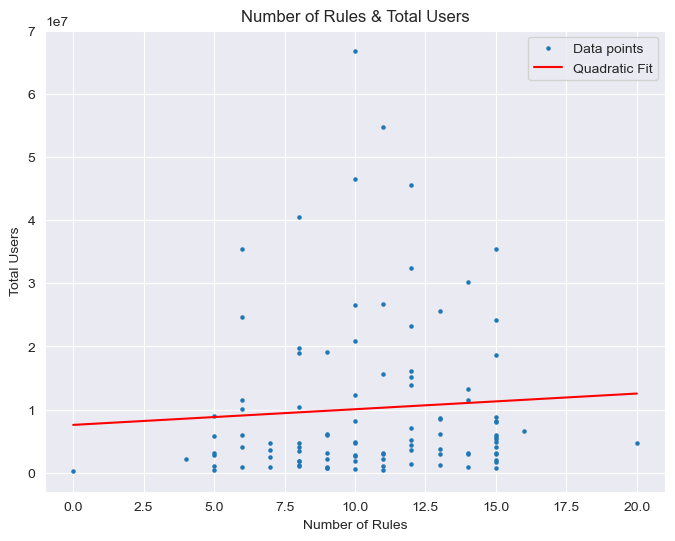

r2=0.0045742468589560215
--------moderators_count,total_users---------
Pearson correlation coefficient: 0.40657878566644756
P-value: 2.698911541721392e-05
Spearmanr correlation coefficient: 0.42301672869140877
P-value: 1.161662164616701e-05


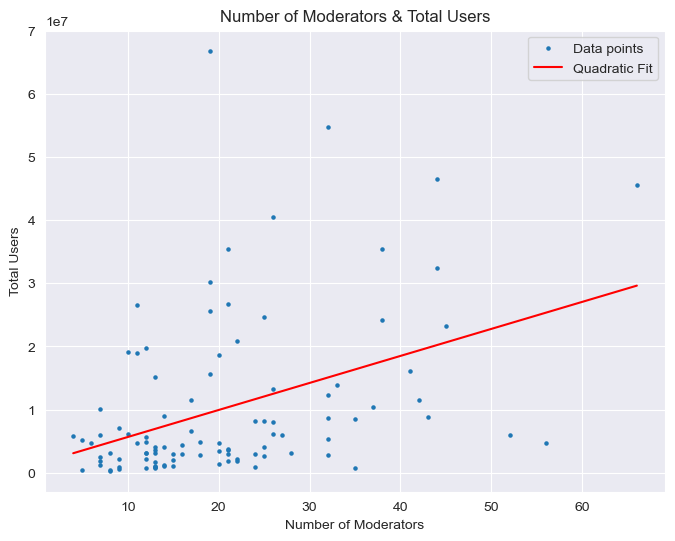

r2=0.16530630895400333
--------rules_num,active_month---------
Pearson correlation coefficient: 0.20622920478603068
P-value: 0.039537542246613606
Spearmanr correlation coefficient: 0.21179854118864103
P-value: 0.034394246813500354


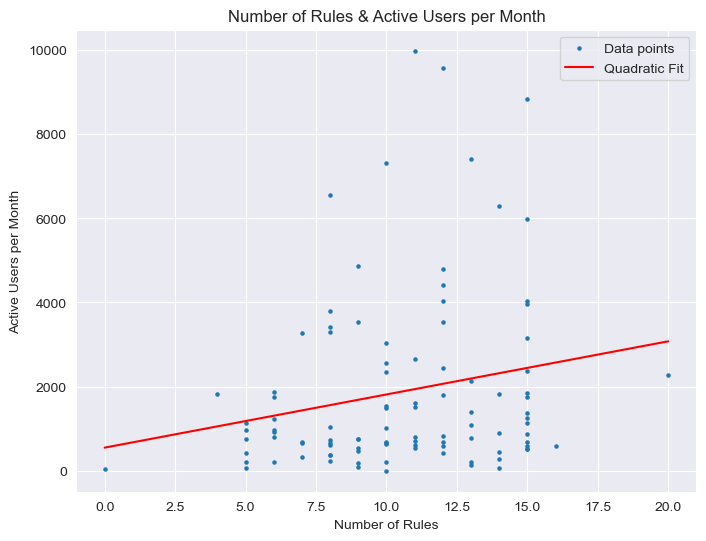

r2=0.042530484906678545
--------moderators_count,active_month---------
Pearson correlation coefficient: 0.48967119218603883
P-value: 2.3364850131030128e-07
Spearmanr correlation coefficient: 0.4691240663468918
P-value: 8.515585041391792e-07


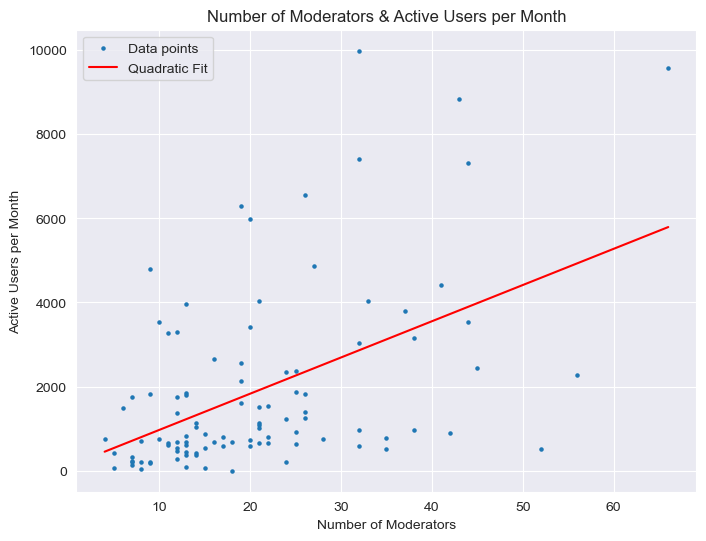

r2=0.23977787645689652


In [14]:
factors= ['rules_num','moderators_count']
user_engagement=['active_rate','total_users','active_month']

label_dict={
    'rules_num':'Number of Rules',
    'blacklist':'Number of Blacklist',
    'active_rate':'Active Users Rate',
    'total_users':'Total Users',
    'active_month':'Active Users per Month',
    'moderators_count':'Number of Moderators'
}

for engagement in user_engagement:
    for factor in factors:
        print(f"--------{factor},{engagement}---------")
        pearsonr_correlation(df_reddit[factor],df_reddit[engagement])
        spearmanr_correlation(df_reddit[factor],df_reddit[engagement])
        xlabel=label_dict[factor]
        ylabel=label_dict[engagement]
    #     
        plot_scatter(df_reddit[factor],df_reddit[engagement],xlabel,ylabel,f'{xlabel} & {ylabel}')

--------active_rate---------
🔍 SHAP Summary Plot (feature importance):


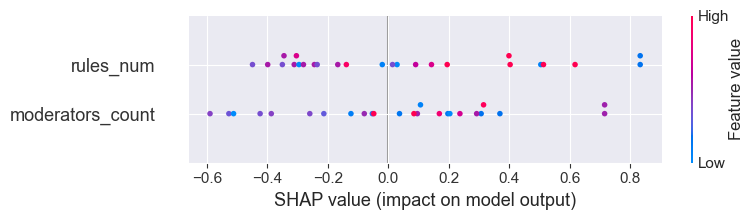

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

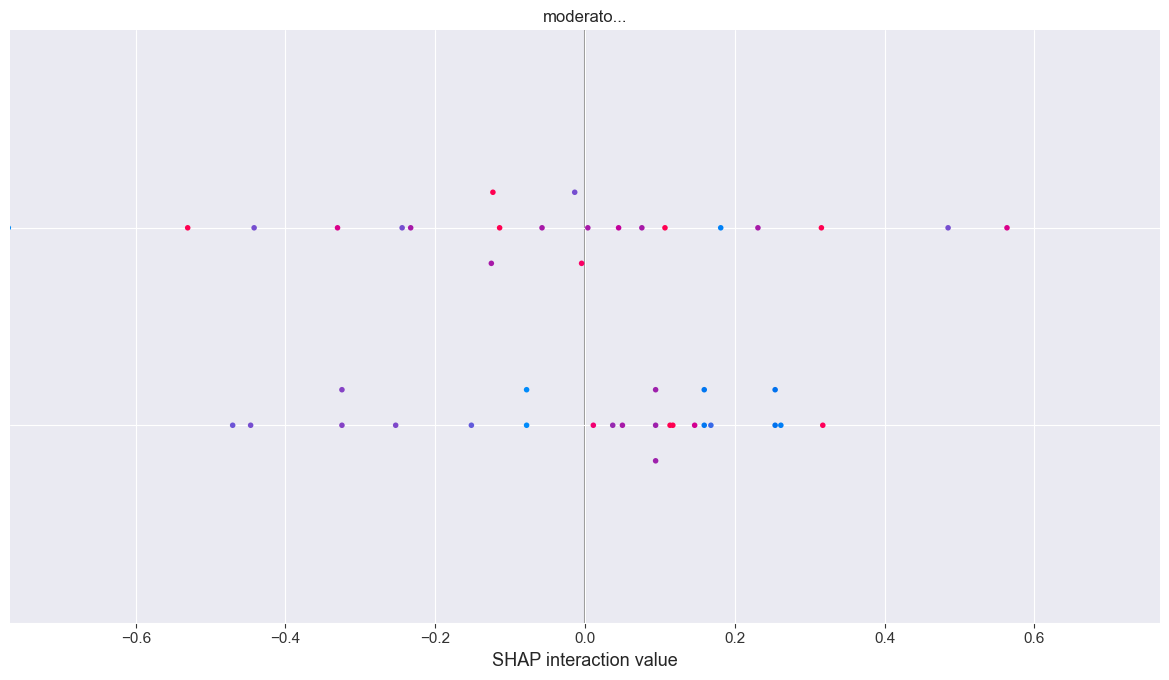

--------total_users---------
🔍 SHAP Summary Plot (feature importance):


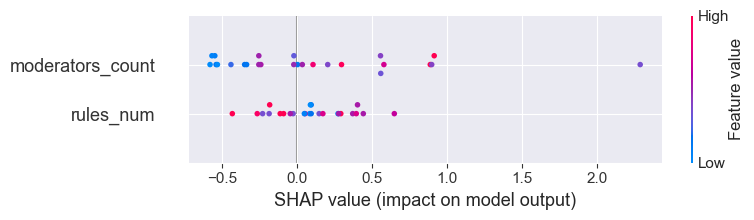

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

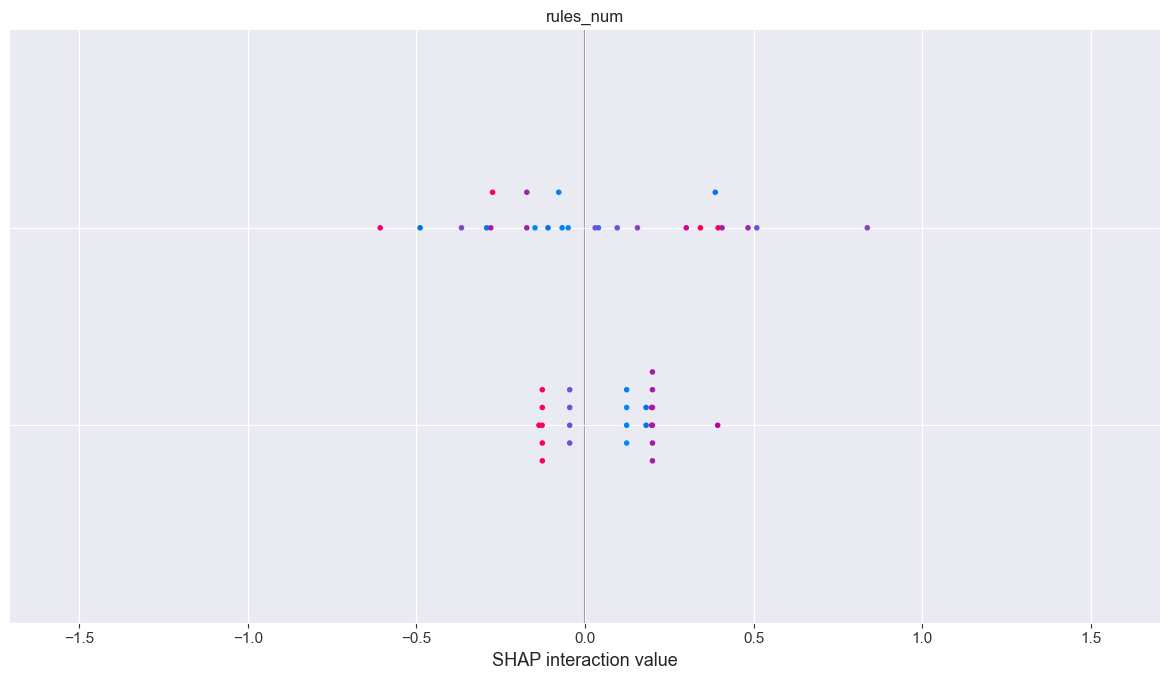

--------active_month---------
🔍 SHAP Summary Plot (feature importance):


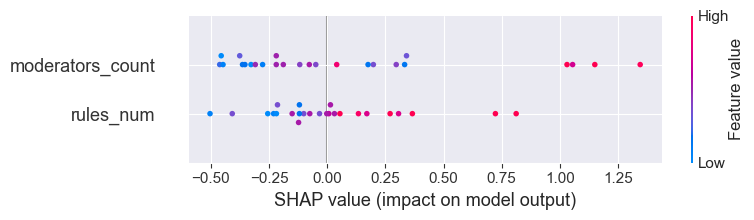

🔍 SHAP Interaction Summary Plot:


<Figure size 640x480 with 0 Axes>

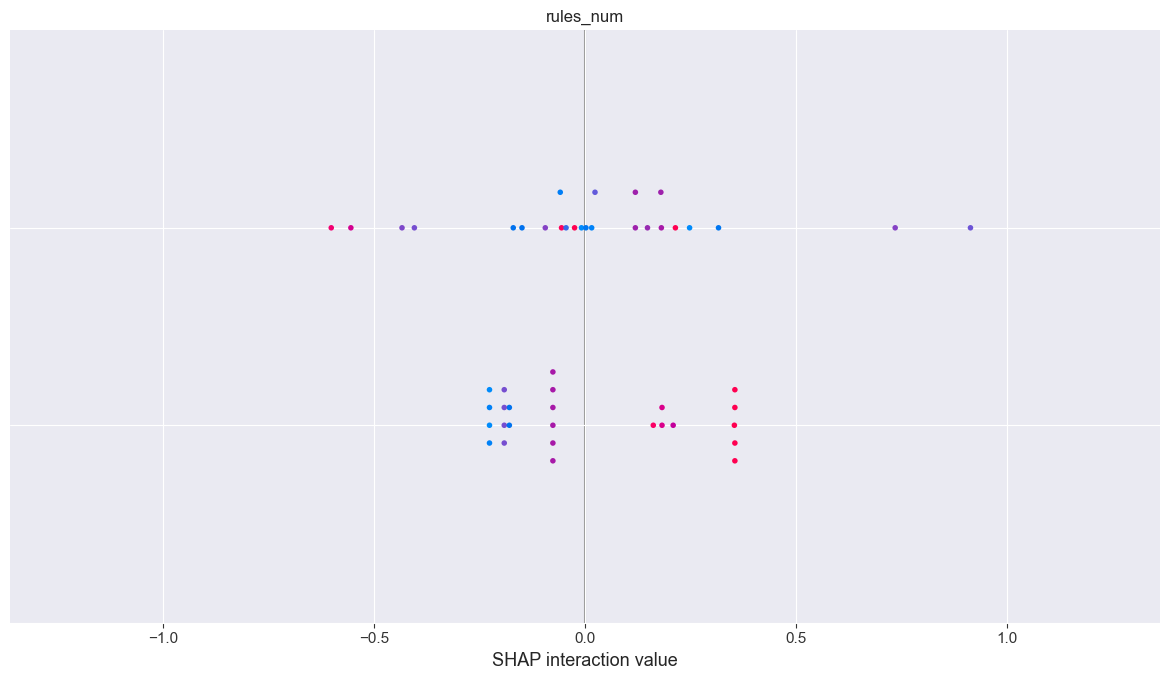

In [15]:
factors= ['rules_num','moderators_count']
user_engagement=['active_rate','total_users','active_month']

label_dict={
    'rules_num':'Number of Rules',
    'blacklist':'Number of Blacklist',
    'active_rate':'Active Users Rate',
    'total_users':'Total Users',
    'active_month':'Active Users per Month',
    'moderators_count':'Number of Moderators'
}

for engagement in user_engagement:
    print(f"--------{engagement}---------")
    shap_analysis(df_reddit,factors,engagement)

## 4. Comparison Between Mastodon & Reddit

In [16]:
user_engagement=['active_rate','total_users','active_month']

for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    print(f"--------rules_num,{engagement}---------")
    fisher_z_test(df['rules_num'],df[engagement],df_reddit['rules_num'],df_reddit[engagement])

--------rules_num,active_rate---------
r1 = 0.050, r2 = 0.060
z = -0.092, p = 0.9266
--------rules_num,total_users---------
r1 = 0.137, r2 = 0.172
z = -0.315, p = 0.7528
--------rules_num,active_month---------
r1 = 0.173, r2 = 0.212
z = -0.345, p = 0.7302


In [17]:


for engagement in user_engagement:
    df=df_re_mastodon[np.isfinite(df_re_mastodon[engagement])].copy()
    print(f"--------rules_num,{engagement}---------")
    fisher_z_test( zscore(df['rules_num']), zscore(df[engagement]), zscore(df_reddit['rules_num']), zscore(df_reddit[engagement]),method='pearson')

--------rules_num,active_rate---------
r1 = 0.007, r2 = 0.004
z = 0.025, p = 0.9798
--------rules_num,total_users---------
r1 = 0.126, r2 = 0.068
z = 0.509, p = 0.6109
--------rules_num,active_month---------
r1 = 0.158, r2 = 0.206
z = -0.429, p = 0.6680
